In [23]:
import json
import tweepy
import pandas as pd
import numpy as np
from pprint import pprint
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn
from tweeter_config import consumer_key, consumer_secret, access_token, access_token_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [24]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [25]:
# our target users are BBC (BBCWorld), CBS (CBS),CNN (CNN), Fox (FoxNews), New York Times (nytimes)
target_users = ["BBCWorld", "CBS", "CNN", "FoxNews", "nytimes"]

total_analys = []

total_scores = []

for user in target_users:
    counter = 1
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
# i need 100 tweets, every page inclueds just 20 tweets. So i need loop through for 5 pages.
    for x in range(1, 6):
        public_tweets = api.user_timeline(user, page=x)
        
        for tweet in public_tweets:
            
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
#            now i need to append those info
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
#         i need to creat a dict for every user with their results.
        
        user_results = {
        "Username": user,
        "Average Compound Score": np.mean(compound_list),
        "Average Postive Score": np.mean(positive_list),
        "Average Neutral Score": np.mean(neutral_list),
        "Average Negative Score": np.mean(negative_list)
    }
        user_scores = {
            "Username" : user,
            "Compound Scores" : compound_list,
            "Postive Scores" : positive_list,
            "Neutral Scores" : neutral_list,
            "Negative Scores" : negative_list
        }
        
        counter += 1
#         i add that dicts to my total_analys
        
    total_analys.append(user_results)
    
    total_scores.append(user_scores)
        
    analys_df_for_chart = pd.DataFrame(total_analys).round(3)
    
    analys_df = pd.DataFrame(total_analys).set_index("Username").round(3)
    
    scores_df = pd.DataFrame(total_scores).set_index("Username")
    
        
        





        


    

In [26]:
analys_df.to_csv("media_sentiment.csv")
analys_df.head()

,Average Compound Score,Average Negative Score,Average Neutral Score,Average Postive Score
Username,,,,
BBCWorld,-0.055,0.120,0.811,0.070
CBS,0.339,0.015,0.797,0.188
CNN,-0.018,0.076,0.857,0.067
FoxNews,-0.077,0.111,0.815,0.073
nytimes,-0.020,0.072,0.863,0.065


In [27]:
scores_df.head()

,Compound Scores,Negative Scores,Neutral Scores,Postive Scores
Username,,,,
BBCWorld,"[-0.2023, 0.2732, -0.8709, 0.0, -0.3182, 0.0, ...","[0.212, 0.0, 0.559, 0.0, 0.223, 0.0, 0.0, 0.30...","[0.625, 0.741, 0.441, 1.0, 0.777, 1.0, 0.637, ...","[0.163, 0.259, 0.0, 0.0, 0.0, 0.0, 0.363, 0.0,..."
CBS,"[0.5574, 0.1867, 0.4199, 0.4926, 0.3555, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.136, 0.0, 0.0, 0.0, 0.0...","[0.796, 0.902, 0.811, 0.758, 0.642, 1.0, 1.0, ...","[0.204, 0.098, 0.189, 0.242, 0.222, 0.0, 0.0, ..."
CNN,"[-0.765, -0.4588, 0.0, -0.4939, 0.0, 0.4019, -...","[0.375, 0.13, 0.0, 0.242, 0.0, 0.0, 0.22, 0.21...","[0.625, 0.87, 1.0, 0.758, 1.0, 0.69, 0.78, 0.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.31, 0.0, 0.0, 0.0,..."
FoxNews,"[0.6249, -0.5994, -0.6908, 0.4019, 0.5499, 0.5...","[0.0, 0.302, 0.289, 0.0, 0.0, 0.0, 0.0, 0.543,...","[0.797, 0.698, 0.711, 0.847, 0.827, 0.852, 0.6...","[0.203, 0.0, 0.0, 0.153, 0.173, 0.148, 0.302, ..."
nytimes,"[0.7579, -0.7184, -0.3612, 0.0, 0.0258, 0.4215...","[0.0, 0.25, 0.179, 0.0, 0.0, 0.0, 0.22, 0.13, ...","[0.764, 0.75, 0.821, 1.0, 0.939, 0.741, 0.679,...","[0.236, 0.0, 0.0, 0.0, 0.061, 0.259, 0.102, 0...."


In [28]:
# now i have two data frame. first shows average score, second shows the last 100 tweets scores.
len(scores_df.loc["CNN"]["Compound Scores"])

100

In [29]:
date = datetime.datetime.today().strftime('%Y-%m-%d')
print(date)

2018-06-26


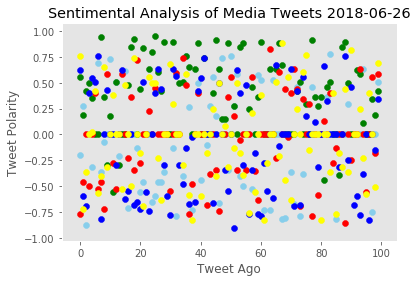

In [30]:

plt.scatter(range(len(scores_df.loc["BBCWorld"]["Compound Scores"])), (scores_df.loc["BBCWorld"]["Compound Scores"]), color='skyblue', marker='o')
plt.scatter(range(len(scores_df.loc["CBS"]["Compound Scores"])), (scores_df.loc["CBS"]["Compound Scores"]), color='green', marker='o')
plt.scatter(range(len(scores_df.loc["CNN"]["Compound Scores"])), (scores_df.loc["CNN"]["Compound Scores"]), color='red', marker='o')
plt.scatter(range(len(scores_df.loc["FoxNews"]["Compound Scores"])), (scores_df.loc["FoxNews"]["Compound Scores"]), color='blue', marker='o')
plt.scatter(range(len(scores_df.loc["nytimes"]["Compound Scores"])), (scores_df.loc["nytimes"]["Compound Scores"]), color='yellow', marker='o')
plt.title(f"Sentimental Analysis of Media Tweets {date}")
plt.xlabel('Tweet Ago')
plt.ylabel('Tweet Polarity')
plt.xlim()
plt.grid()
plt.savefig('overall_sentiment_analysis.png')

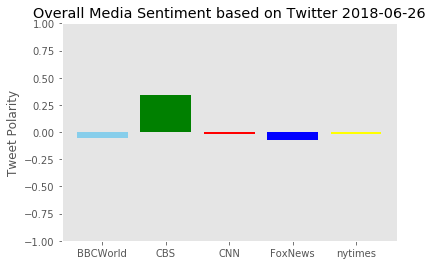

In [31]:
colors = ['skyblue', 'green', 'red', 'blue', 'yellow']
plt.bar(analys_df_for_chart['Username'], analys_df_for_chart['Average Compound Score'], color=colors)
plt.title(f'Overall Media Sentiment based on Twitter {date}')
plt.ylabel('Tweet Polarity')
plt.ylim(-1, 1)
plt.grid()
plt.savefig('ave_sentiment_compound_scores.png')